In [1]:
# Importing Washington DC Bike Rental Data
load("C:/Users/Dell/Desktop/Datasets 19/Bikes.RData")
head(bikesJuly)

hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,instant,mnth,yr
0,FALSE,FALSE,Clear to partly cloudy,0.76,0.7273,0.66,0.0000,149,13004,7,1
1,FALSE,FALSE,Clear to partly cloudy,0.74,0.6970,0.70,0.1343,93,13005,7,1
2,FALSE,FALSE,Clear to partly cloudy,0.72,0.6970,0.74,0.0896,90,13006,7,1
3,FALSE,FALSE,Clear to partly cloudy,0.72,0.7121,0.84,0.1343,33,13007,7,1
4,FALSE,FALSE,Clear to partly cloudy,0.70,0.6667,0.79,0.1940,4,13008,7,1
5,FALSE,FALSE,Clear to partly cloudy,0.68,0.6364,0.79,0.1045,10,13009,7,1


In [2]:
# Outcome and input variables
(outcome <- "cnt")
(vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"))
# The formula string for bikes rented as a function of the inputs
(fmla <- paste(outcome, "~", paste(vars, collapse = " + ")))

[1] "cnt"

[1] "hr"         "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed"

[1] "cnt ~ hr + holiday + workingday + weathersit + temp + atemp + hum + windspeed"

In [3]:
# Fitting the Random Forest model with "ranger"
install.packages("ranger")
library(ranger)
set.seed
(bike_model_rf <- ranger(fmla, 
                         bikesJuly, 
                         num.trees = 500, 
                         respect.unordered.factors = "order"))

# Training R squared = 0.82

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ranger' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\Rtmp0SArk6\downloaded_packages


Warning message:
"package 'ranger' was built under R version 3.6.3"

function (seed, kind = NULL, normal.kind = NULL, sample.kind = NULL) 
{
    kinds <- c("Wichmann-Hill", "Marsaglia-Multicarry", "Super-Duper", 
        "Mersenne-Twister", "Knuth-TAOCP", "user-supplied", "Knuth-TAOCP-2002", 
        "L'Ecuyer-CMRG", "default")
    n.kinds <- c("Buggy Kinderman-Ramage", "Ahrens-Dieter", "Box-Muller", 
        "user-supplied", "Inversion", "Kinderman-Ramage", "default")
    s.kinds <- c("Rounding", "Rejection", "default")
    if (length(kind)) {
        if (!is.character(kind) || length(kind) > 1L) 
            stop("'kind' must be a character string of length 1 (RNG to be used).")
        if (is.na(i.knd <- pmatch(kind, kinds) - 1L)) 
            stop(gettextf("'%s' is not a valid abbreviation of an RNG", 
                kind), domain = NA)
        if (i.knd == length(kinds) - 1L) 
            i.knd <- -1L
    }
    else i.knd <- NULL
    if (!is.null(normal.kind)) {
        if (!is.character(normal.kind) || length(normal.kind) != 
            1L) 
            stop("'normal.kind' must be a character string of length 1")
        normal.kind <- pmatch(normal.kind, n.kinds) - 1L
        if (is.na(normal.kind)) 
            stop(gettextf("'%s' is not a valid choice", normal.kind), 
                domain = NA)
        if (normal.kind == 0L) 
            stop("buggy version of Kinderman-Ramage generator is not allowed", 
                domain = NA)
        if (normal.kind == length(n.kinds) - 1L) 
            normal.kind <- -1L
    }
    if (!is.null(sample.kind)) {
        if (!is.character(sample.kind) || length(sample.kind) != 
            1L) 
            stop("'sample.kind' must be a character string of length 1")
        sample.kind <- pmatch(sample.kind, s.kinds) - 1L
        if (is.na(sample.kind)) 
            stop(gettextf("'%s' is not a valid choice", sample.kind), 
                domain = NA)
        if (sample.kind == 0L) 
            warning("non-uniform 'Rounding' sampler used", domain = NA)
        if (sample.kind == length(s.kinds) - 1L) 
            sample.kind <- -1L
    }
    .Internal(set.seed(seed, i.knd, normal.kind, sample.kind))
}
<bytecode: 0x000000002edcd508>
<environment: namespace:base>

Ranger result

Call:
 ranger(fmla, bikesJuly, num.trees = 500, respect.unordered.factors = "order") 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      744 
Number of independent variables:  8 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       8388.733 
R squared (OOB):                  0.8170948 

In [4]:
# Predictions on the August data
bikesAugust$pred <- predict(bike_model_rf, bikesAugust)$predictions
# Calculate the RMSE of the predictions
library(tidyverse)
bikesAugust %>% 
  mutate(residual = cnt - pred)  %>%        # calculating the residual
  summarize(rmse  = sqrt(mean(residual^2))) # calculating rmse

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


rmse
97.80169


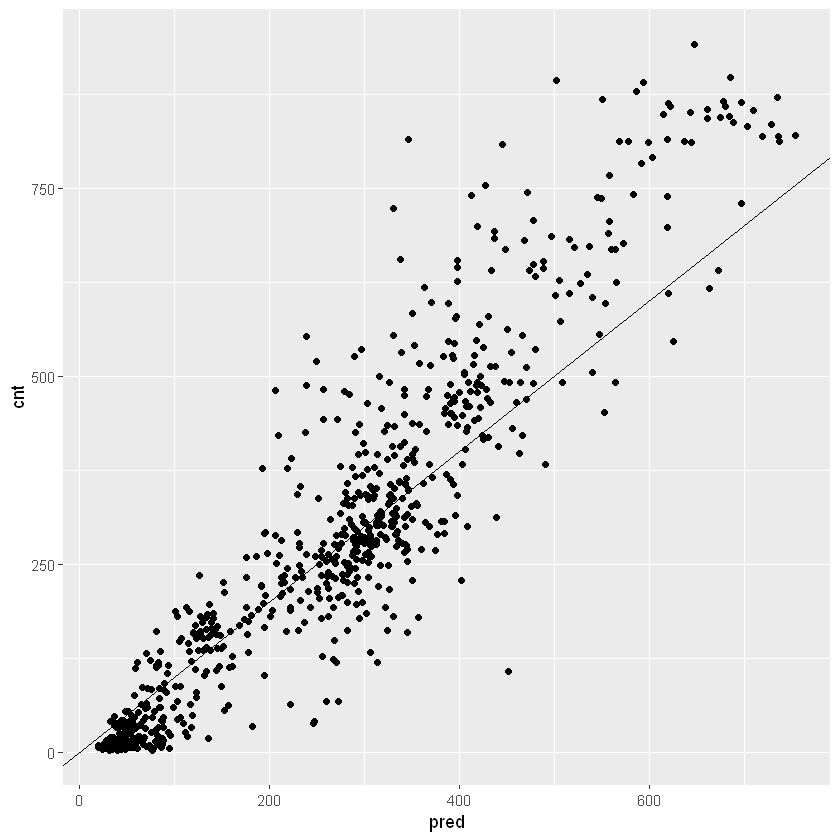

In [5]:
# Plot of actual outcome vs predictions (predictions on x-axis)
ggplot(bikesAugust, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

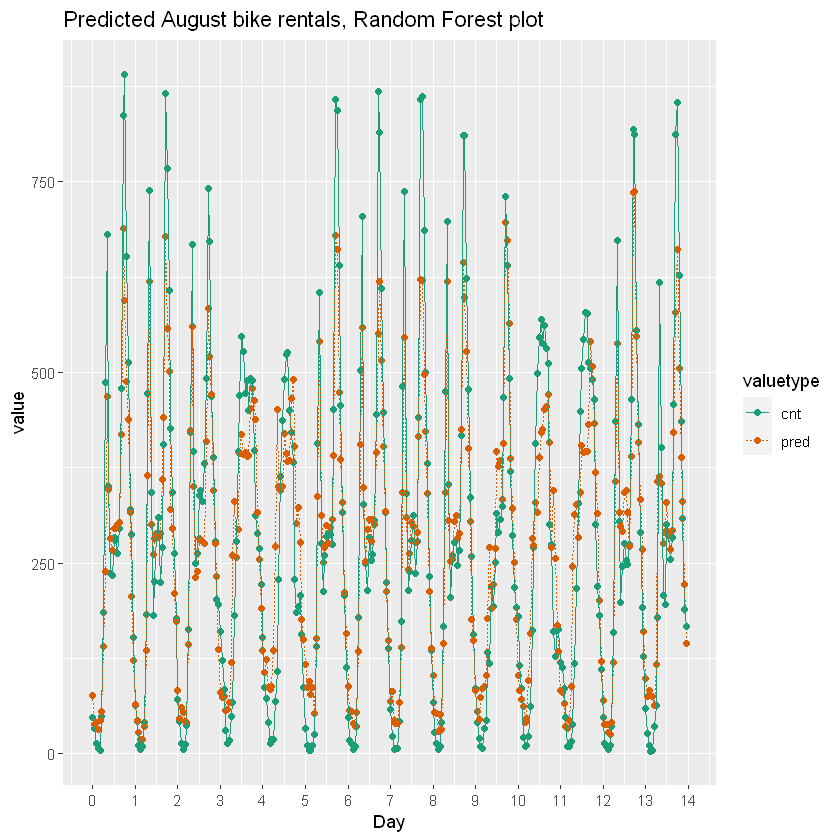

In [6]:
# First two weeks examined 
first_two_weeks <- bikesAugust %>% 
  # Converting unit to days
  mutate(instant = (instant - min(instant)) / 24) %>% 
  # cnt and pred into a column named value with key valuetype
  gather(key = valuetype, value = value, cnt, pred) %>%
  # Filtering for rows in the first two weeks
  filter(instant < 14)

# Plot of predictions and cnt by date/time 
ggplot(first_two_weeks, aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Random Forest plot")

In [7]:
# Preparation for Gradient Boosting Machines model
install.packages("vtreat")
library(vtreat)
install.packages("magrittr")
library(magrittr)

# Treatment plan
treatplan <- designTreatmentsZ(bikesJuly, vars, verbose = FALSE)
# Get the "clean" and "lev" variables from the scoreFrame
(newvars <- treatplan %>%
  use_series(scoreFrame) %>%               
  filter(code %in% c("clean", "lev")) %>%  # get the variables you care about
  use_series(varName))                     # get the varName column

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'vtreat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\Rtmp0SArk6\downloaded_packages


Warning message:
"package 'vtreat' was built under R version 3.6.3"Loading required package: wrapr
Warning message:
"package 'wrapr' was built under R version 3.6.3"
Attaching package: 'wrapr'

The following object is masked from 'package:dplyr':

    coalesce

The following object is masked from 'package:tidyr':

    unpack

The following object is masked from 'package:tibble':

    view

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\Rtmp0SArk6\downloaded_packages


Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



[1] "holiday"                                
 [2] "workingday"                             
 [3] "temp"                                   
 [4] "atemp"                                  
 [5] "hum"                                    
 [6] "windspeed"                              
 [7] "hr_lev_x_0"                             
 [8] "hr_lev_x_1"                             
 [9] "hr_lev_x_10"                            
[10] "hr_lev_x_11"                            
[11] "hr_lev_x_12"                            
[12] "hr_lev_x_13"                            
[13] "hr_lev_x_14"                            
[14] "hr_lev_x_15"                            
[15] "hr_lev_x_16"                            
[16] "hr_lev_x_17"                            
[17] "hr_lev_x_18"                            
[18] "hr_lev_x_19"                            
[19] "hr_lev_x_2"                             
[20] "hr_lev_x_20"                            
[21] "hr_lev_x_21"                            
[22] "hr_lev_x_22"                            
[23] "hr_lev_x_23"                            
[24] "hr_lev_x_3"                             
[25] "hr_lev_x_4"                             
[26] "hr_lev_x_5"                             
[27] "hr_lev_x_6"                             
[28] "hr_lev_x_7"                             
[29] "hr_lev_x_8"                             
[30] "hr_lev_x_9"                             
[31] "weathersit_lev_x_Clear_to_partly_cloudy"
[32] "weathersit_lev_x_Light_Precipitation"   
[33] "weathersit_lev_x_Misty"

In [8]:
# Preparing training data
bikesJuly.treat <- prepare(treatplan, bikesJuly,  varRestriction = newvars)
# Preparing test data
bikesAugust.treat <- prepare(treatplan, bikesAugust, varRestriction = newvars)

In [9]:
# Gradient Boost model with xgboost package
install.packages("xgboost")
library(xgboost)

# Run xgb.cv
cv <- xgb.cv(data = as.matrix(bikesJuly.treat), 
            label = bikesJuly$cnt,
            nrounds = 100,
            nfold = 5,
            objective = "reg:linear",
            eta = 0.3,
            max_depth = 6,
            early_stopping_rounds = 10,
            verbose = 0   # silent
)

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\Rtmp0SArk6\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [10]:
# Getting the evaluation log
elog <- cv$evaluation_log

# Determining how many trees minimize training and test error
elog %>% 
  summarize(ntrees.train = which.min(train_rmse_mean),   # the index of min(train_rmse_mean)
            ntrees.test  = which.min(test_rmse_mean))    # the index of min(test_rmse_mean)

ntrees.train,ntrees.test
63,53


In [11]:
# Running xgboost with appropriate number of trees
bike_model_xgb <- xgboost(data = as.matrix(bikesJuly.treat), # training data as matrix
                   label = bikesJuly$cnt,  # column of outcomes
                   nrounds = 63,       # number of trees to build
                   objective = "reg:linear", # objective
                   eta = 0.3,
                   depth = 6,
                   verbose = 0  # silent
)

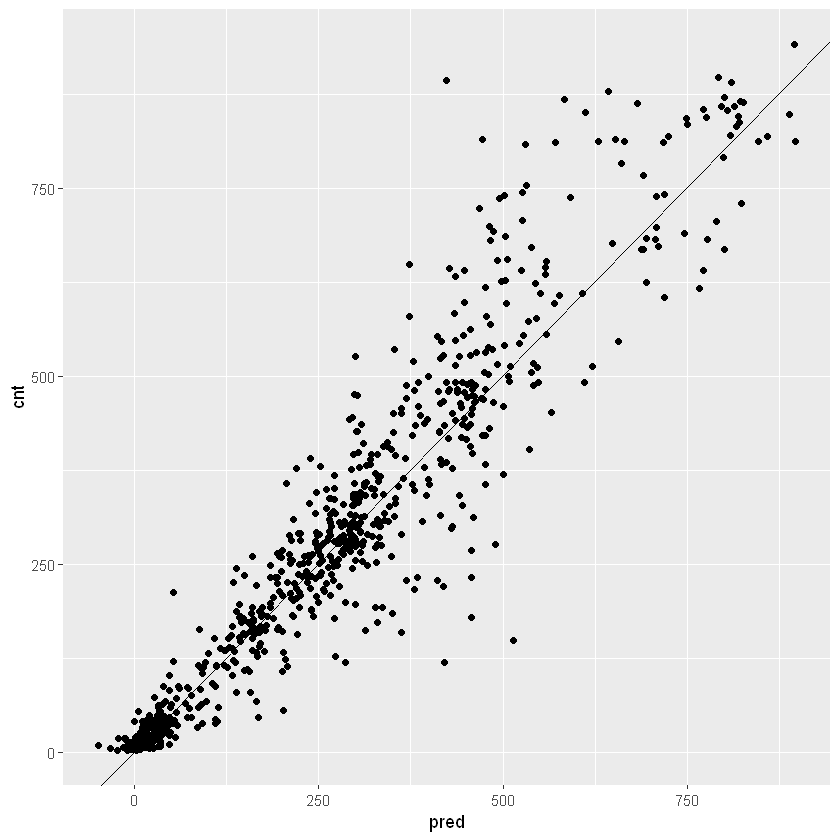

In [12]:
# Pedictions on test data
bikesAugust$pred <- predict(bike_model_xgb, as.matrix(bikesAugust.treat))

# Plot of predictions vs actual bike rental count
ggplot(bikesAugust, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

In [13]:
# Calculating RMSE of Gradient Boosting model
bikesAugust %>%
  mutate(residuals = cnt - pred) %>%
  summarize(rmse = sqrt(mean(residuals^2)))

rmse
76.16694


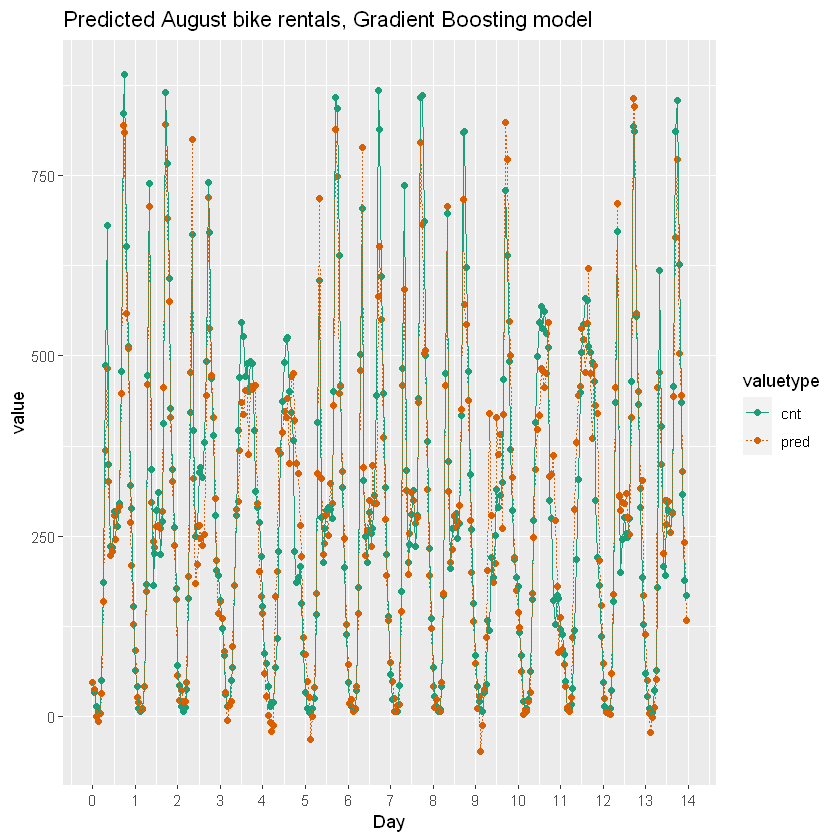

In [14]:
# Plot of predictions and actual bike rentals as a function of time (days)
bikesAugust %>% 
  mutate(instant = (instant - min(instant))/24) %>%  # converting unit to days
  gather(key = valuetype, value = value, cnt, pred) %>%
  filter(instant < 14) %>% # first two weeks
  ggplot(aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Gradient Boosting model")

In [15]:
# Comparison of Root Mean Squared Errors on both models
# RMSE(Random_Forest) = 95.99
# RMSE(Gradient_Boosting) = 76.94

### Result: Gradient Boosting model performs significantly better than Random Forest model on this case.
## Random Forest model also successful with a 0.82 R squared.